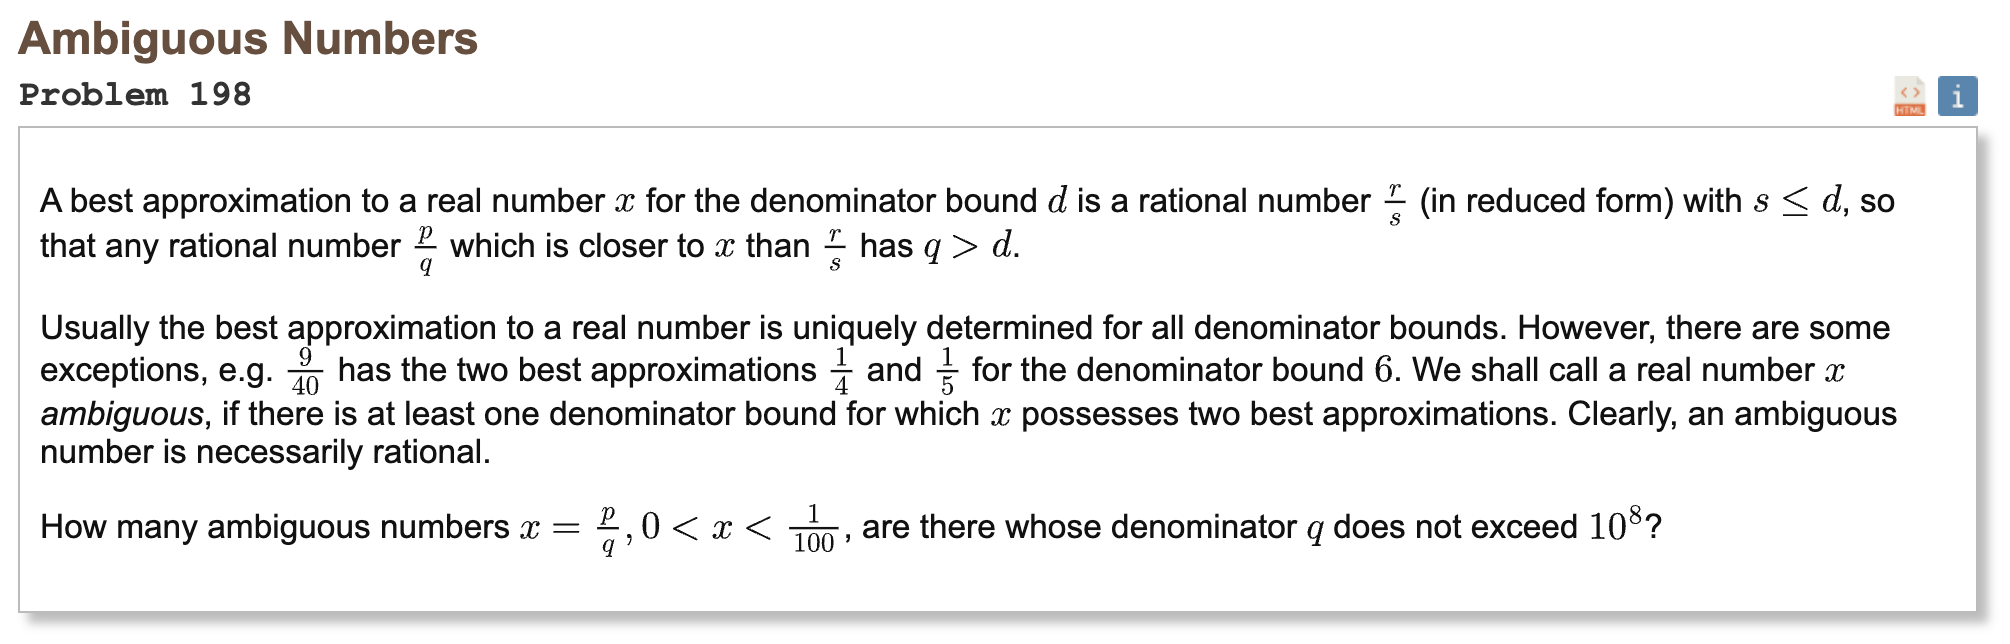

## Initial approach

* two best approximations happen exactly at midpoints of Farey neighbor fractions
* for neighbors h/k < H/K with Hk − hK = 1, the midpoint is (hK + Hk) / (2kK)
* this midpoint is already reduced, with denominator exactly 2kK
* only count midpoints with 0 < x < 1/100 and 2kK ≤ 10^8
* avoid full Farey construction, traverse the Stern–Brocot tree starting from 0/1 and 1/1
* splitting by the mediant gives new neighbor pairs with midpoint denominators 2k(k+K) and 2K(k+K)
* do iterative DFS, keep intervals with midpoint denominator ≤ 10^8, count when 100·midnum < midden

In [1]:
def count_ambiguous(D=10**8, R=100):
    stack = [(0, 1, 1, 1)]
    ans = 0

    while stack:
        h, k, H, K = stack.pop()

        if R * h >= k:
            continue

        midden = 2 * k * K
        if midden > D:
            continue

        midnum = h * K + H * k
        if R * midnum < midden:
            ans += 1

        mednum = h + H
        medden = k + K

        leftden = 2 * k * medden
        if leftden <= D:
            stack.append((h, k, mednum, medden))

        rightden = 2 * K * medden
        if rightden <= D:
            stack.append((mednum, medden, H, K))

    return ans

In [2]:
%%time

result = count_ambiguous(10**8, 100)
print("Result:", result)

Result: 52374425
CPU times: user 9.3 s, sys: 61.8 ms, total: 9.36 s
Wall time: 9.41 s
